# Exploración de datos

In [18]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

Para una exploración inicial de los datos, se utilizarán datos desde 5 años atrás de las siguientes variables presentes en ambas estaciones:
- SO2
- NO2
- NO
- NOX
- O3
- CO
- Dirección del viento
- Velocidad del viento

In [19]:
params = ['SO2','NO2', 'NO', 'NOX', 'O3', 'CO']
from_last = '5y'

## Los Maitenes

In [20]:
maitenes_df = get_minma_data(params, 'maitenes', from_last=from_last)
maitenes_df.head()

/tmp/ipykernel_2156/4118557904.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  maitenes_df = get_minma_data(params, 'maitenes', from_last=from_last)


,Registros validados_SO2,Registros preliminares_SO2,Registros no validados_SO2,Registros validados_NO2,Registros preliminares_NO2,Registros no validados_NO2,Registros validados_NO,Registros preliminares_NO,Registros no validados_NO,Registros validados_NOX,Registros preliminares_NOX,Registros no validados_NOX,Registros validados_O3,Registros preliminares_O3,Registros no validados_O3,Registros validados_CO,Registros preliminares_CO,Registros no validados_CO
2017-09-06 18:00:00,NaN,NaN,3.22,NaN,NaN,2.16,NaN,NaN,2.01888,NaN,NaN,4.18258,NaN,NaN,21.0,NaN,NaN,0.22
2017-09-06 19:00:00,NaN,NaN,3.58,NaN,NaN,3.25,NaN,NaN,2.20725,NaN,NaN,5.46078,NaN,NaN,18.0,NaN,NaN,0.25
2017-09-06 20:00:00,NaN,NaN,7.39,NaN,NaN,13.01,NaN,NaN,2.41338,NaN,NaN,15.42390,NaN,NaN,9.0,NaN,NaN,0.29
2017-09-06 21:00:00,NaN,NaN,6.40,NaN,NaN,12.33,NaN,NaN,2.38637,NaN,NaN,14.72000,NaN,NaN,10.0,NaN,NaN,0.28
2017-09-06 22:00:00,NaN,NaN,4.77,NaN,NaN,7.22,NaN,NaN,2.31295,NaN,NaN,9.53500,NaN,NaN,13.0,NaN,NaN,0.27


In [21]:
maitenes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43830 entries, 2017-09-06 18:00:00 to 2022-09-06 23:00:00
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Registros validados_SO2     0 non-null      float64
 1   Registros preliminares_SO2  0 non-null      float64
 2   Registros no validados_SO2  43346 non-null  float64
 3   Registros validados_NO2     0 non-null      float64
 4   Registros preliminares_NO2  0 non-null      float64
 5   Registros no validados_NO2  43114 non-null  float64
 6   Registros validados_NO      0 non-null      float64
 7   Registros preliminares_NO   0 non-null      float64
 8   Registros no validados_NO   42863 non-null  float64
 9   Registros validados_NOX     0 non-null      float64
 10  Registros preliminares_NOX  0 non-null      float64
 11  Registros no validados_NOX  43211 non-null  float64
 12  Registros validados_O3      0 non-null      float64
 

Se observa que de las columnas, las únicas que poseen datos son aquellas que tienen datos preliminares, por lo que el resto se descartará

In [22]:
cols_to_drop = list(maitenes_df.filter(regex='(?<!no validados)_.*')) 
maitenes_df = maitenes_df.drop(cols_to_drop, axis=1)

Valores nulos

In [23]:
maitenes_df.isna().sum()

Registros no validados_SO2    484
Registros no validados_NO2    716
Registros no validados_NO     967
Registros no validados_NOX    619
Registros no validados_O3     493
Registros no validados_CO     967
dtype: int64

Resumen estadístico

In [24]:
maitenes_df.describe()

,Registros no validados_SO2,Registros no validados_NO2,Registros no validados_NO,Registros no validados_NOX,Registros no validados_O3,Registros no validados_CO
count,43346.000000,43114.000000,42863.000000,43211.000000,43337.000000,42863.000000
mean,9.014335,6.027903,5.107988,11.080127,13.732261,0.268700
std,18.902016,4.473848,8.268546,11.514632,6.504838,0.137349
min,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.960000,3.010000,1.943910,5.516775,9.000000,0.170000
50%,2.900000,4.890000,2.970230,7.858130,13.000000,0.240000
75%,5.840000,7.540000,4.641375,11.812300,18.000000,0.340000
max,480.250000,70.190000,243.155000,266.650000,43.000000,1.080000


Histogramas

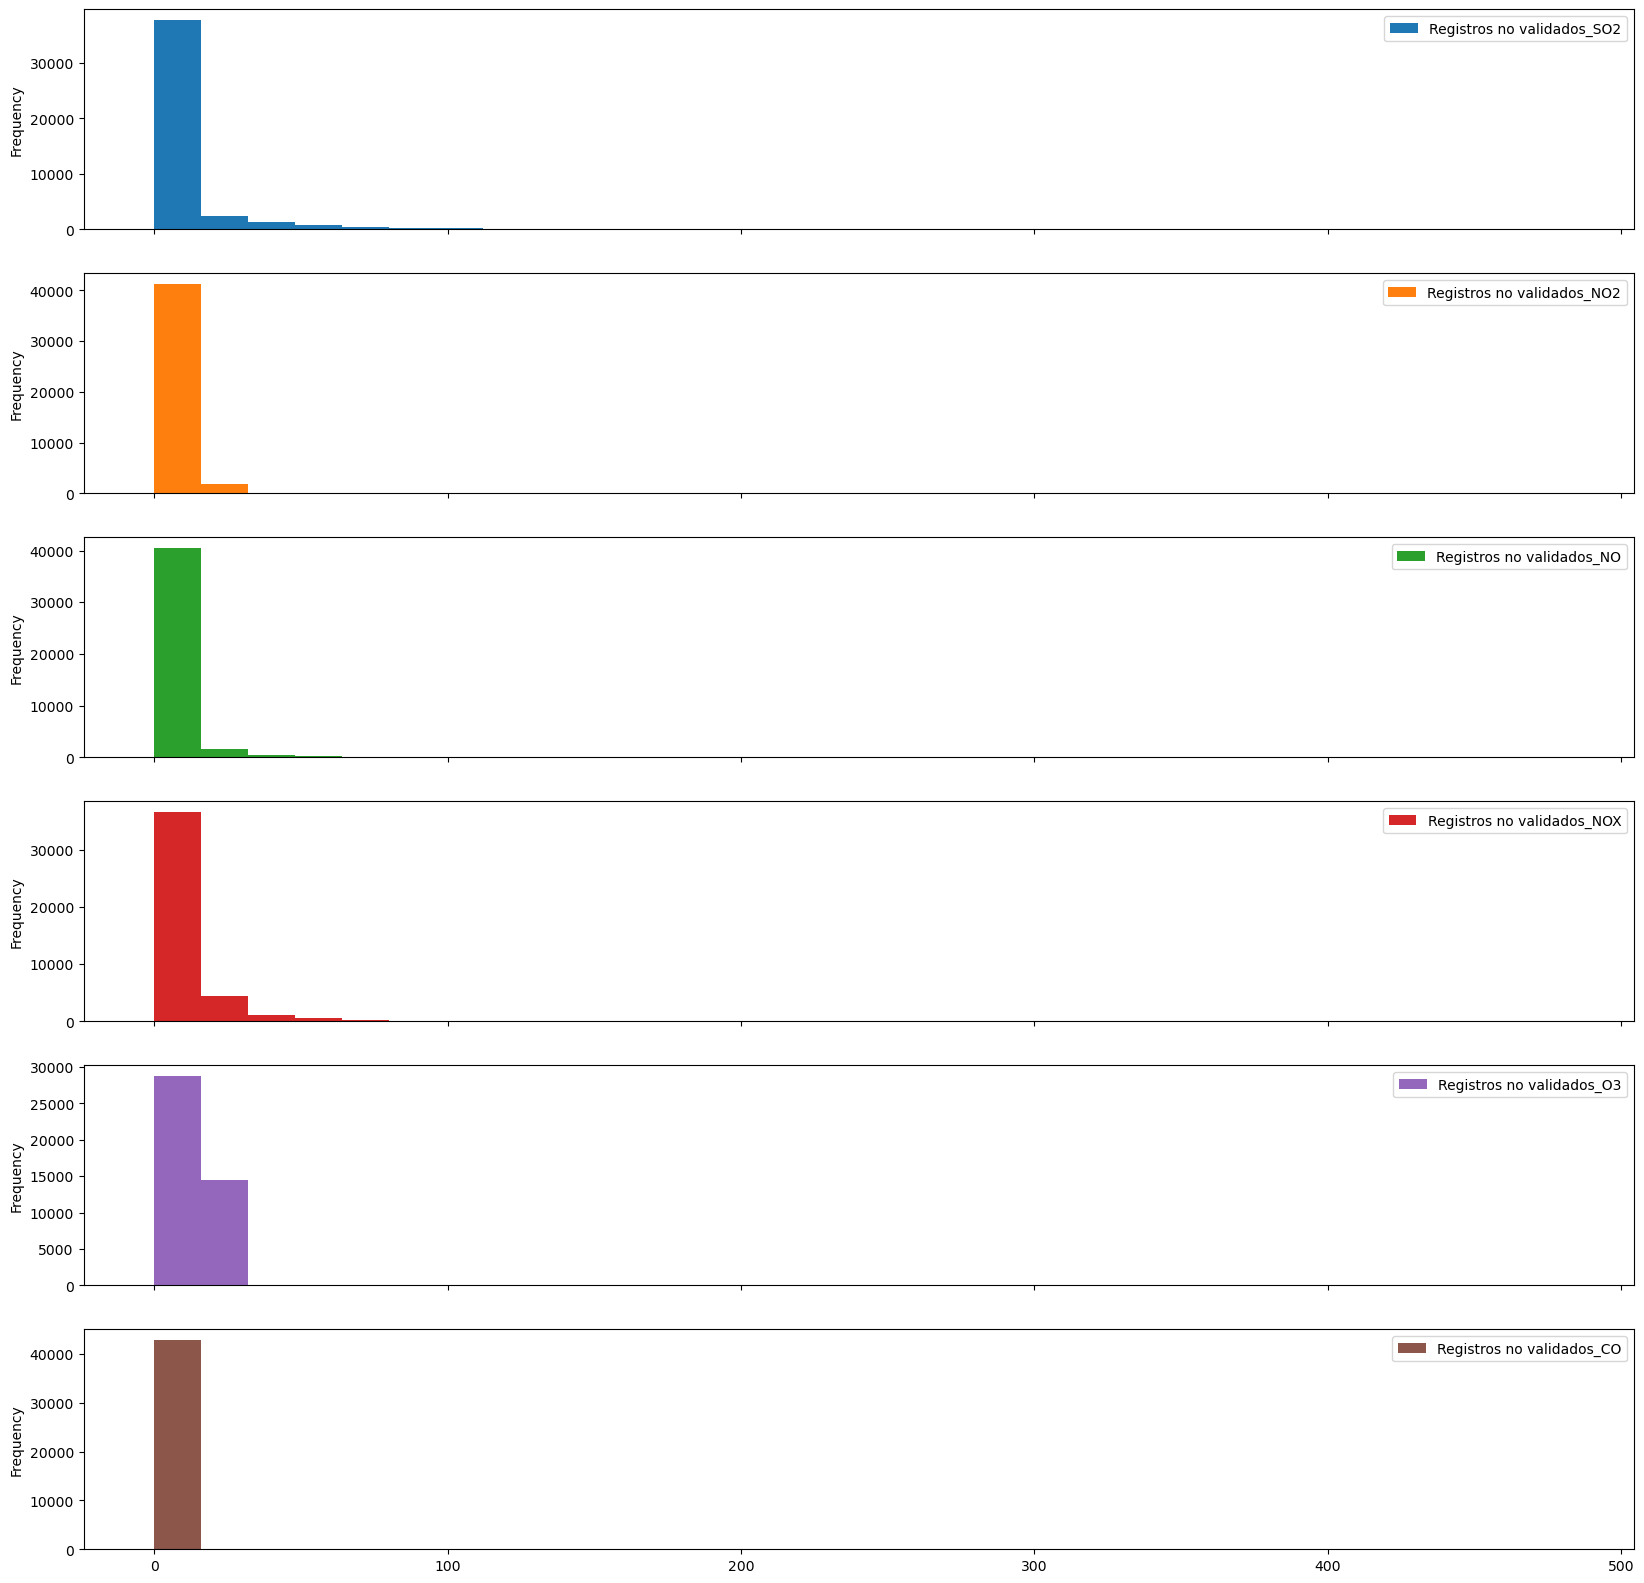

In [25]:
maitenes_df.plot.hist(subplots=True, figsize=(20,20), bins=30)
plt.show()

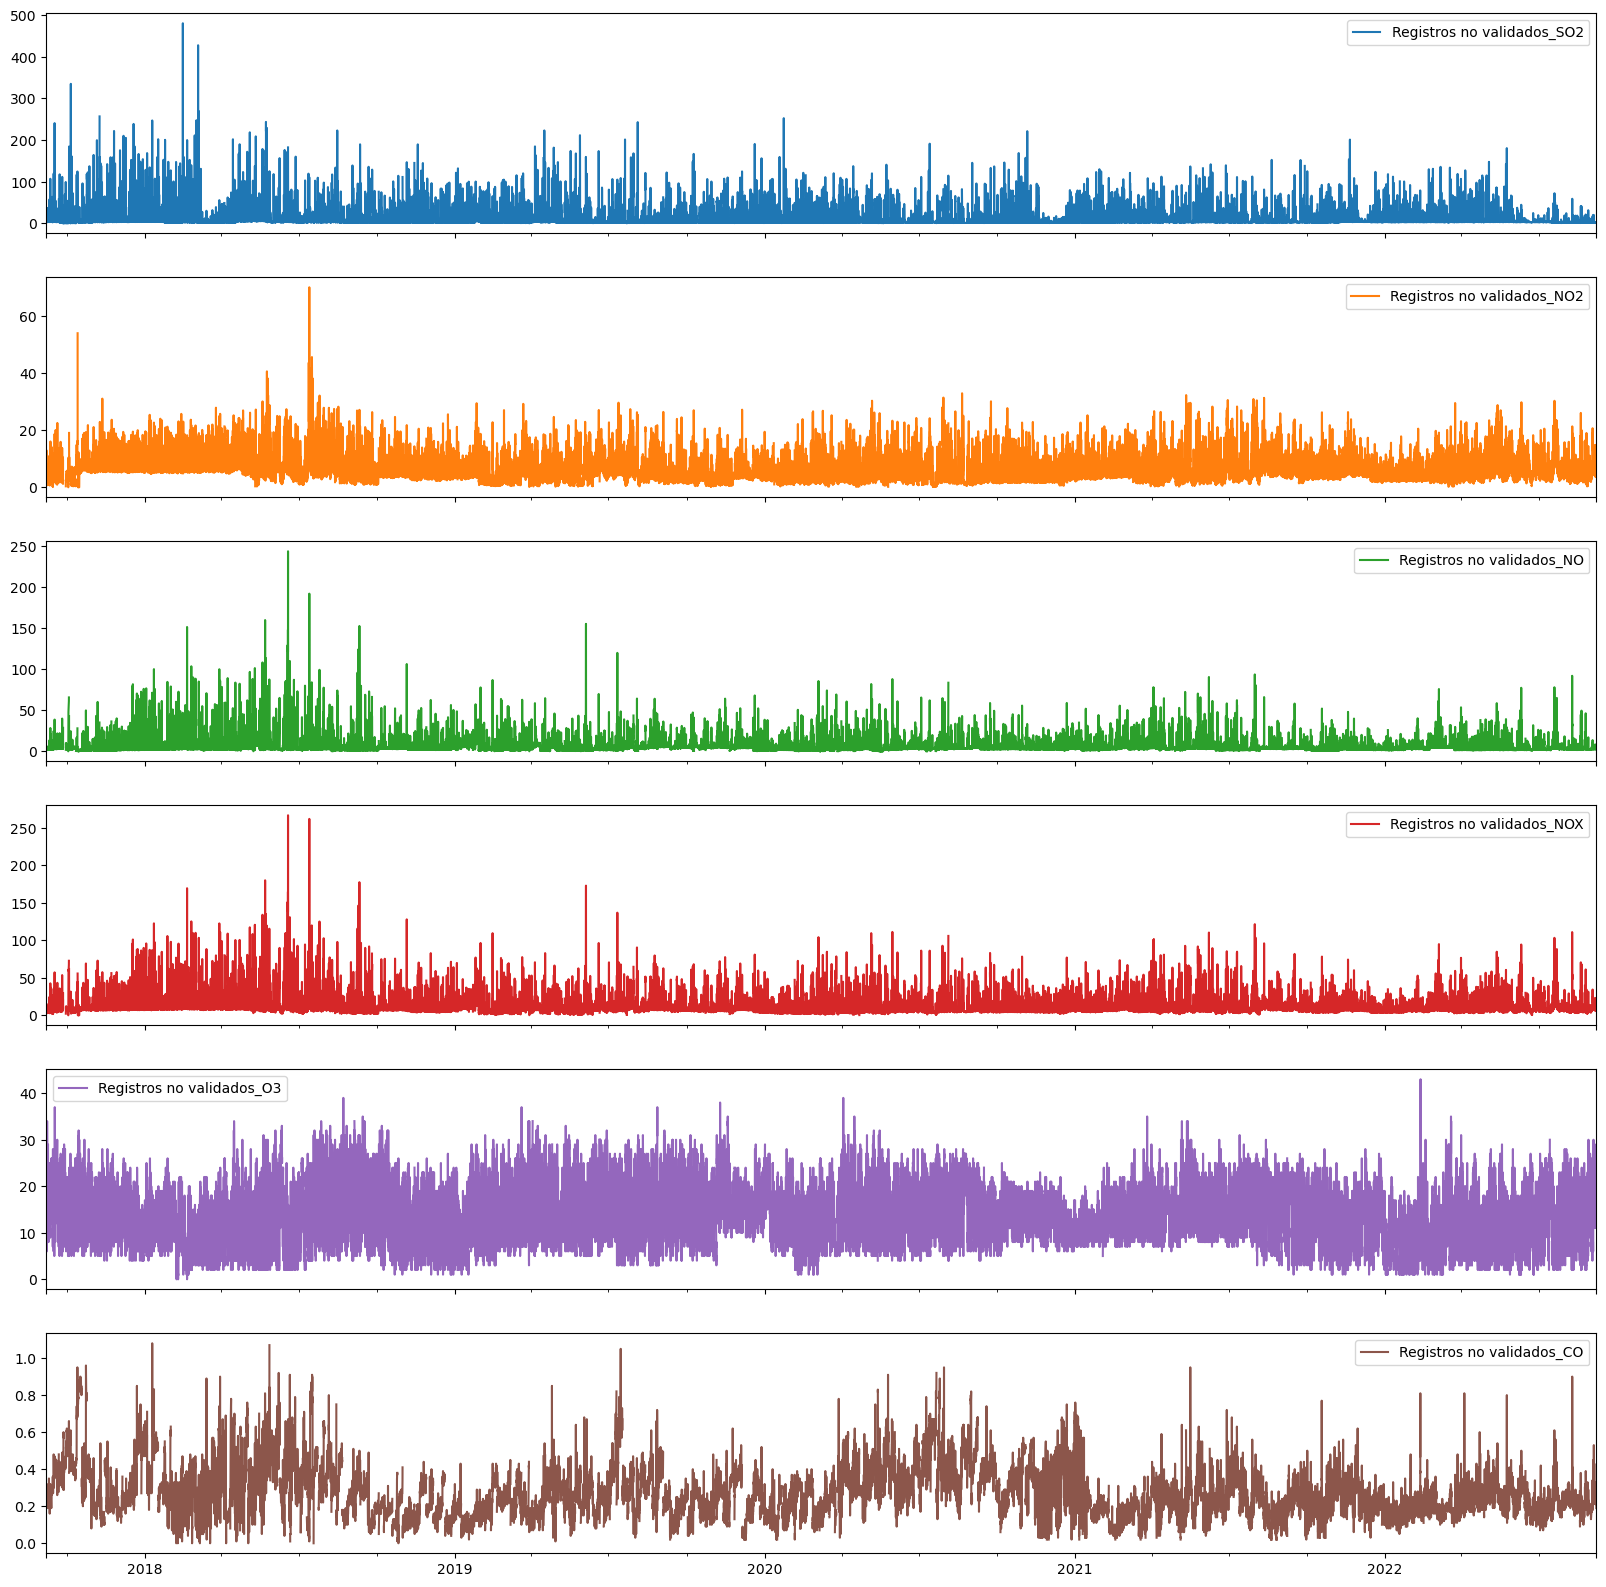

In [27]:
maitenes_df.plot(subplots=True, figsize=(20,20))
plt.show()

## Quintero